# Gradient boosting principel example

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Simpelt syntetisk datasæt
data = {
    "Besøgende": [1000, 1500, 2000, 2500, 1200, 1800, 2200, 3000],
    "Regner": [1, 0, 1, 0, 0, 1, 0, 1],  # 1 for "Ja", 0 for "Nej"
    "Salg": [500, 700, 900, 1100, 600, 800, 1000, 1200],  # Måske i tusindvis af kroner
}

df = pd.DataFrame(data)

In [3]:
# Opdeling af data
X = df[["Besøgende", "Regner"]]
y = df["Salg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [4]:
# Træning af Gradient Boosting model
model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [5]:
# Forudsigelse og evaluering
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

In [6]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Med saglg på:")
print(f"{X_test}, fås et salg på:")
print(f"{predictions}")

Mean Squared Error: 9980.10
Med saglg på:
   Besøgende  Regner
1       1500       0
5       1800       1, fås et salg på:
[600.23606594 900.03681697]


### Plot af de Faktiske vs. Forudsagte Værdier
At plotte de faktiske vs. forudsagte værdier er en simpel måde at vurdere, hvor godt din model præsterer.
På plottet bør punkterne gerne falde tæt omkring den røde linje (45-graders linje), som repræsenterer perfekt forudsigelse.

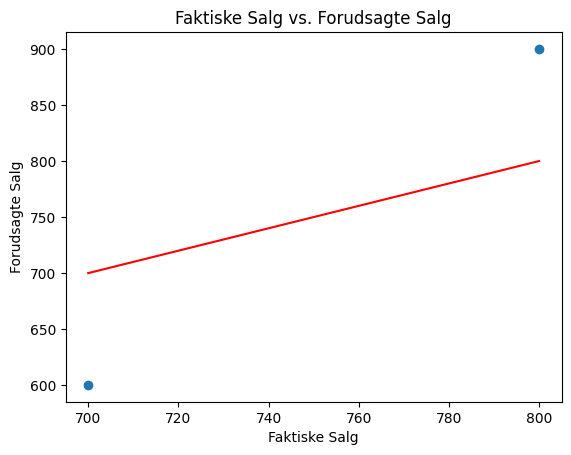

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Faktiske Salg")
plt.ylabel("Forudsagte Salg")
plt.title("Faktiske Salg vs. Forudsagte Salg")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # En 45-graders linje
plt.show()


## Residual Plot
Et residual plot viser forskellen (residualerne) mellem de faktiske og de forudsagte værdier og kan give indsigt i, om din model har systematiske fejl.
Du bør gerne se et tilfældigt mønster, hvilket indikerer, at modellen passer godt til dataene. Hvis der er et ikke-tilfældigt mønster, kan det indikere, at din model ikke fanger en eller anden underliggende tendens i dataene.

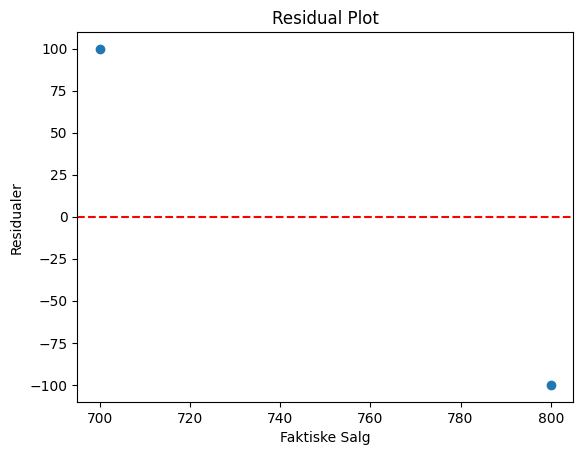

In [8]:
residuals = y_test - predictions

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Faktiske Salg")
plt.ylabel("Residualer")
plt.title("Residual Plot")
plt.show()


## Feature Importance
Hvis du bruger en tree-baseret model som Gradient Boosting, kan du også visualisere feature importance, som viser, hvilke features der er mest indflydelsesrige i at lave forudsigelser.
Dette viser en rangering af de features, der bidrager mest til modellens forudsigelser.

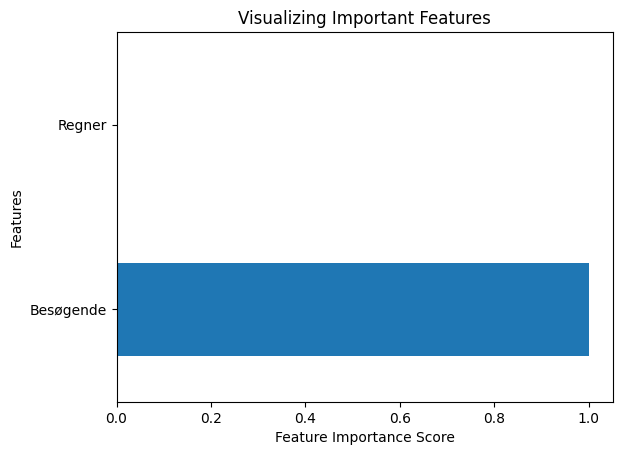

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()


## Learning Curves
Learning curves kan give indsigt i, hvor godt modellen lærer fra træningsdataen og om den generelt over- eller under-tilpasser.
Dette kan hjælpe dig med at se, om din model ville drage fordel af mere data, eller om der er overtilpasning/undertilpasning.

c:\Users\pban\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:1651: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(


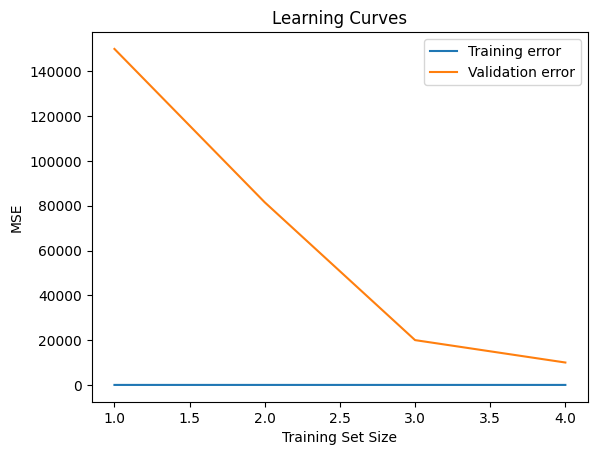

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=2, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Validation error')
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curves")
plt.legend()
plt.show()
